In [1]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from mapper_functions import plot_global_contour

from my_functions import read_obsfcstana

In [10]:
# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_i = []
obs_fcst_mean_list_i = []
obs_ana_mean_list_i = []
omf_mean_list_i = []
oma_mean_list_i = []
dates_list_i = []
omf_max_list_i = []
omf_std_list_i = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20160331', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)
    # Calculate the maximum absolute difference between obs_obs and obs_fcst
    if obs_fcst.size > 0 and obs_obs.size > 0 and obs_fcst.shape == obs_obs.shape:
        omf_max = np.max(abs(obs_obs - obs_fcst))
    else:
        omf_max = np.nan
        print('Current date = ', current_date)
    omf_std = np.std(obs_obs - obs_fcst)


    # Append the mean values to the lists
    obs_obs_mean_list_i.append(obs_obs_mean)
    obs_fcst_mean_list_i.append(obs_fcst_mean)
    obs_ana_mean_list_i.append(obs_ana_mean)
    omf_mean_list_i.append(omf_mean)
    oma_mean_list_i.append(oma_mean)
    omf_max_list_i.append(omf_max)
    omf_std_list_i.append(omf_std)
    
    # Append the current date to the dates list
    dates_list_i.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

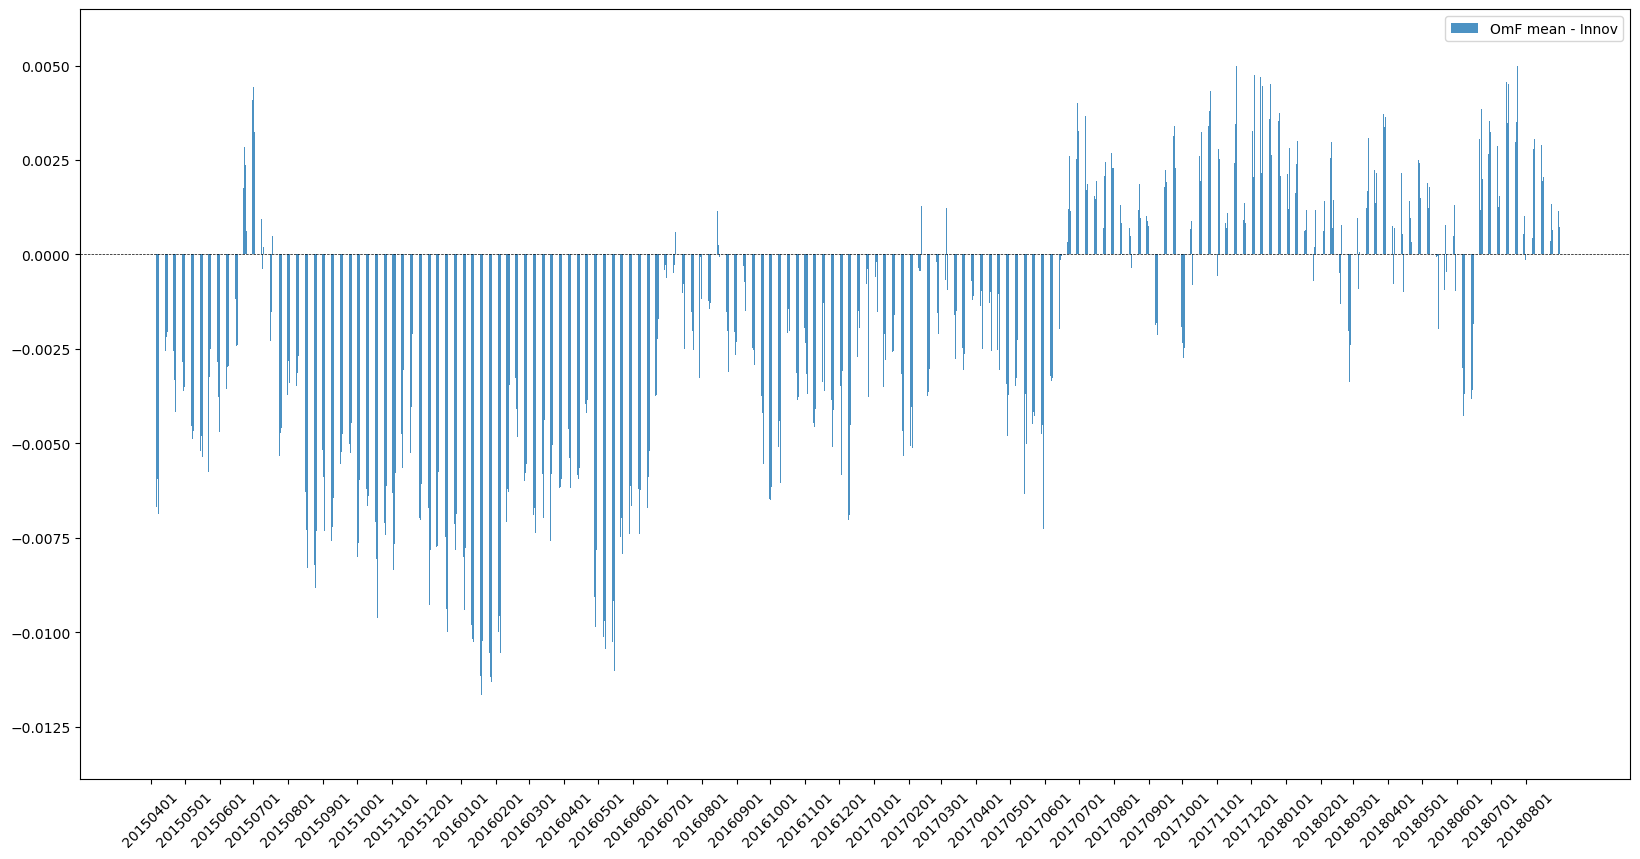

In [6]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,10))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(dates_list_i))
plt.bar(index, omf_mean_list_i, bar_width, alpha=opacity, label='OmF mean - Innov')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_i if date.endswith('01')]
xtick_indices = [dates_list_i.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

plt.legend()

# Save the figure as a PNG file
plt.savefig('OmF_mean_ts_v3.png')

plt.show()

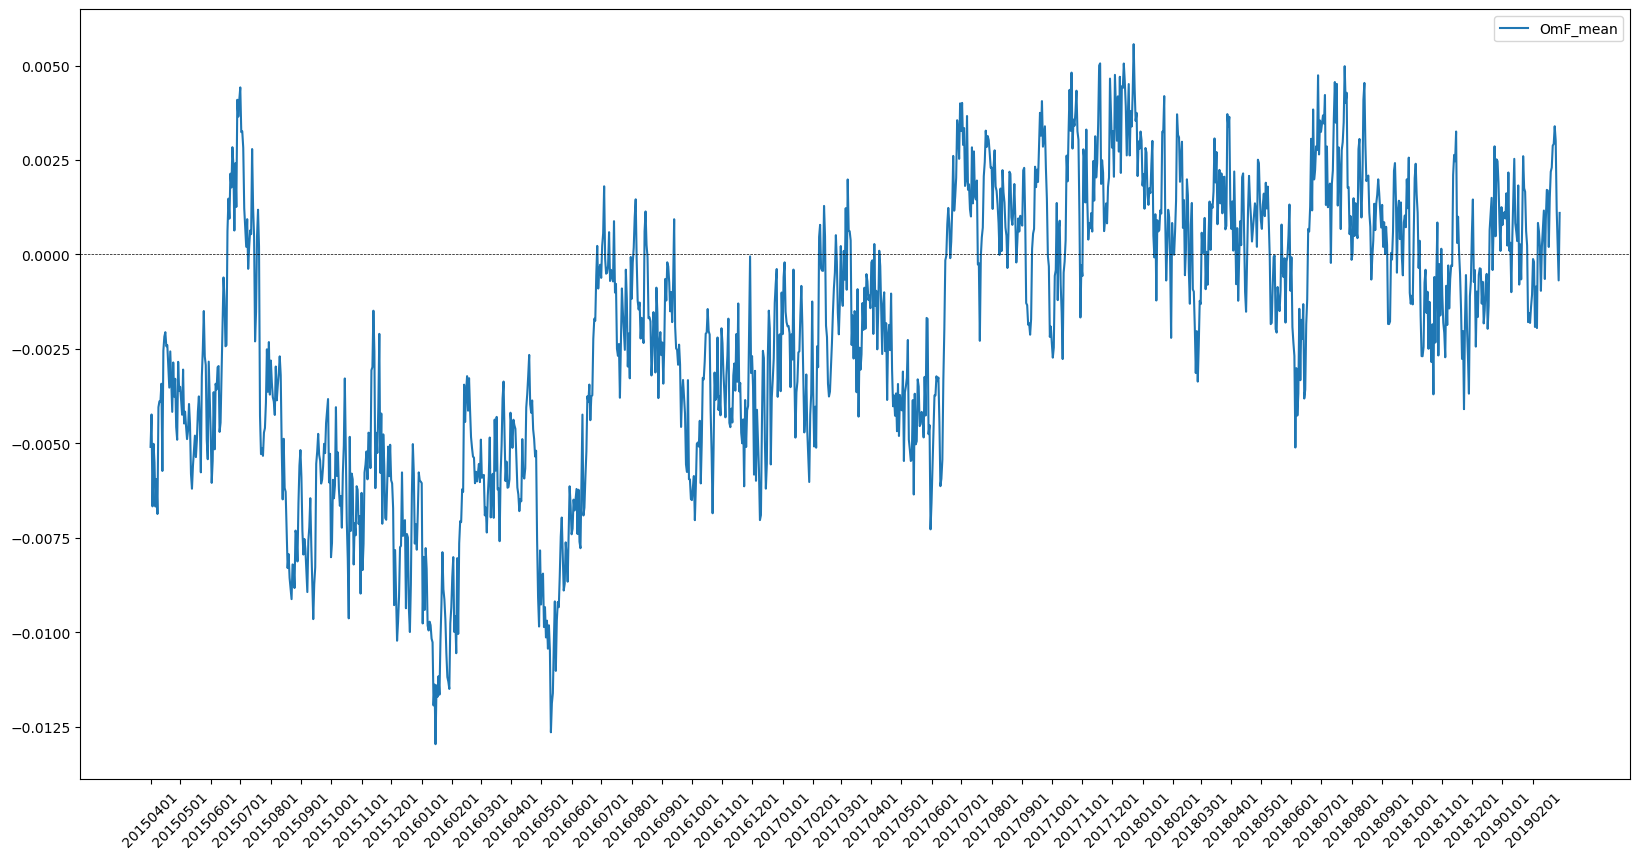

In [11]:
# Create a plot of the mean values
plt.figure(figsize=(20,10))
plt.plot(dates_list_i, omf_mean_list_i, label='OmF_mean')
# plt.plot(dates_list_i, obs_ana_mean_list_i, label='obs_ana_mean')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show every 10 days
xticks = [date for date in dates_list_i if date.endswith('01')]
plt.xticks(xticks, rotation=45)

# Save the figure as a PNG file
# plt.savefig('innov_obs.png')

plt.show()


In [ ]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,10))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(dates_list_i))
plt.bar(index, omf_max_list_i, bar_width, alpha=opacity, label='OmF max - Innov')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_i if date.endswith('01')]
xtick_indices = [dates_list_i.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

plt.legend()

# Save the figure as a PNG file
plt.savefig('OmF_max_ts_v2.png')

plt.show()

In [ ]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,10))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(dates_list_i))
plt.bar(index, omf_std_list_i, bar_width, alpha=opacity, label='OmF StdDev - Innov')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_i if date.endswith('01')]
xtick_indices = [dates_list_i.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

plt.legend()

# Save the figure as a PNG file
plt.savefig('OmF_std_ts_v2.png')

plt.show()

In [ ]:
# Define the list of paths
paths = ['/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M05',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M06',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M07',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M08',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M09',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M10',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M11',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M12',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M01',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M02',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M03',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M04',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M05',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M06',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M07',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M08',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M09',
        ]

# Define the common file name start
file_name_start = 'ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.201'

# Define the print flag
printflag = False

# Initialize lists to store the returned values
date_times = []
obs_species_list = []
obs_tilenum_list = []
obs_lon_list = []
obs_lat_list = []
obs_obs_list = []
obs_fcst_list = []


# Loop over the paths
for path in paths:
    # Call the read_obsfcstana function for the current path
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)
    
    # Append the returned values to the lists
    date_times.append(date_time)
    obs_species_list.append(obs_species)
    obs_tilenum_list.append(obs_tilenum)
    obs_lon_list.append(obs_lon)
    obs_lat_list.append(obs_lat)
    obs_obs_list.append(obs_obs)
    obs_fcst_list.append(obs_fcst)

# Combine the returned values from all paths
date_time = np.concatenate(date_times)
obs_species = np.concatenate(obs_species_list)
obs_tilenum = np.concatenate(obs_tilenum_list)
obs_lon = np.concatenate(obs_lon_list)
obs_lat = np.concatenate(obs_lat_list)
obs_obs = np.concatenate(obs_obs_list)
obs_fcst = np.concatenate(obs_fcst_list)

# Save the combined values to a file
np.savez('combined_values_innov_18mnth.npz', date_time=date_time, obs_species=obs_species, obs_tilenum=obs_tilenum, obs_lon=obs_lon, obs_lat=obs_lat, 
         obs_obs=obs_obs, obs_obsvar=obs_obsvar, obs_fcst=obs_fcst, obs_fcstvar=obs_fcstvar, obs_ana=obs_ana, obs_anavar=obs_anavar)

In [ ]:
# Define the list of paths
paths = ['/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M10',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M11',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M12',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017/M01',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017/M02',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017/M03',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017/M14',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017/M15',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017/M16',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017/M07',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017/M08',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017/M09',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017/M10',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017/M11',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017/M12',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2018/M01',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2018/M02',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2018/M03',
        ]

# Define the common file name start
file_name_start = 'ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.201'

# Define the print flag
printflag = False

# Initialize lists to store the returned values
date_times = []
obs_species_list = []
obs_tilenum_list = []
obs_lon_list = []
obs_lat_list = []
obs_obs_list = []
obs_fcst_list = []


# Loop over the paths
for path in paths:
    # Call the read_obsfcstana function for the current path
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)
    
    # Append the returned values to the lists
    date_times.append(date_time)
    obs_species_list.append(obs_species)
    obs_tilenum_list.append(obs_tilenum)
    obs_lon_list.append(obs_lon)
    obs_lat_list.append(obs_lat)
    obs_obs_list.append(obs_obs)
    obs_fcst_list.append(obs_fcst)

# Combine the returned values from all paths
date_time = np.concatenate(date_times)
obs_species = np.concatenate(obs_species_list)
obs_tilenum = np.concatenate(obs_tilenum_list)
obs_lon = np.concatenate(obs_lon_list)
obs_lat = np.concatenate(obs_lat_list)
obs_obs = np.concatenate(obs_obs_list)
obs_fcst = np.concatenate(obs_fcst_list)

# Save the combined values to a file
np.savez('combined_values_innov_18mnth_v2.npz', date_time=date_time, obs_species=obs_species, obs_tilenum=obs_tilenum, obs_lon=obs_lon, obs_lat=obs_lat, 
         obs_obs=obs_obs, obs_obsvar=obs_obsvar, obs_fcst=obs_fcst, obs_fcstvar=obs_fcstvar, obs_ana=obs_ana, obs_anavar=obs_anavar)

In [4]:
# Load the saved values from the file
data = np.load('combined_values_innov_18mnth.npz', allow_pickle=True)

# Access the variables
date_time3 = data['date_time']
obs_species3 = data['obs_species']
obs_tilenum3 = data['obs_tilenum']
obs_lon3 = data['obs_lon']
obs_lat3 = data['obs_lat']
obs_obs3 = data['obs_obs']
obs_fcst3 = data['obs_fcst']

In [5]:
# Load the saved values from the file
data = np.load('combined_values_innov_18mnth_v2.npz', allow_pickle=True)

# Access the variables
date_time4 = data['date_time']
obs_species4 = data['obs_species']
obs_tilenum4 = data['obs_tilenum']
obs_lon4 = data['obs_lon']
obs_lat4 = data['obs_lat']
obs_obs4 = data['obs_obs']
obs_fcst4 = data['obs_fcst']

In [6]:
nodata = -9999

obs_obs3[obs_obs3 == nodata] = np.nan
obs_fcst3[obs_fcst3 == nodata] = np.nan

obs_obs4[obs_obs4 == nodata] = np.nan
obs_fcst4[obs_fcst4 == nodata] = np.nan

In [7]:
# Put the observation data into a 2D array

#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

# Calculate the number of grid cells in the x direction
nx = int((180.0 - ll_lon) / dlon)

# Calculate the number of grid cells in the y direction
ny = int((90.0 - ll_lat) / dlat)

# Calculate lon and lat
lon = np.linspace(ll_lon, ll_lon + nx * dlon, nx)
lat = np.linspace(ll_lat, ll_lat + ny * dlat, ny)

# Create 2D grid of lons and lats
lon2d, lat2d = np.meshgrid(lon, lat)

In [ ]:
n_obs = len(obs_obs3)

i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)

In [ ]:
for i in range(n_obs):
    i_out[i] = np.floor((obs_lon3[i] - ll_lon)/dlon)
    j_out[i] = np.floor((obs_lat3[i] - ll_lat)/dlat)

In [ ]:
# Initialize a list of lists to store the observations for each grid cell
obs_list = [[[] for i in range(ny)] for j in range(nx)]
fcst_list = [[[] for i in range(ny)] for j in range(nx)]
omf_list = [[[] for i in range(ny)] for j in range(nx)]

# Find all the observations that fall into each grid cell
for i in range(n_obs):
    obs_list[int(i_out[i])][int(j_out[i])].append(obs_obs3[i])
    fcst_list[int(i_out[i])][int(j_out[i])].append(obs_fcst3[i])
    omf_list[int(i_out[i])][int(j_out[i])].append(obs_obs3[i] - obs_fcst3[i])

In [ ]:
np.savez('innov_2D_grids.npz', obs_list=obs_list, fcst_list=fcst_list, omf_list=omf_list)

In [8]:
# Load the saved values from the file
data = np.load('innov_2D_grids.npz', allow_pickle=True)

# Access the variables
obs_list = data['obs_list']
fcst_list = data['fcst_list']
omf_list = data['omf_list']

KeyError: 'obs_list is not a file in the archive'

In [9]:
n_obs = len(obs_obs4)

i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)

In [10]:
for i in range(n_obs):
    i_out[i] = np.floor((obs_lon4[i] - ll_lon)/dlon)
    j_out[i] = np.floor((obs_lat4[i] - ll_lat)/dlat)

In [ ]:
# Initialize a list of lists to store the observations for each grid cell
obs_list = [[[] for i in range(ny)] for j in range(nx)]
fcst_list = [[[] for i in range(ny)] for j in range(nx)]
omf_list = [[[] for i in range(ny)] for j in range(nx)]

# Find all the observations that fall into each grid cell
for i in range(n_obs):
    obs_list[int(i_out[i])][int(j_out[i])].append(obs_obs4[i])
    fcst_list[int(i_out[i])][int(j_out[i])].append(obs_fcst4[i])
    omf_list[int(i_out[i])][int(j_out[i])].append(obs_obs4[i] - obs_fcst3[i])

In [ ]:
np.savez('innov_2D_grids_v2.npz', obs_list=obs_list, fcst_list=fcst_list, omf_list=omf_list)

In [ ]:
# Load the saved values from the file
data = np.load('innov_2D_grids_v2.npz', allow_pickle=True)

# Access the variables
obs_list2 = data['obs_list']
fcst_list2 = data['fcst_list']
omf_list2 = data['omf_list']

In [ ]:
# Calculate the mean of the observations in each grid cell
obs_mean = np.zeros([nx, ny])
obs_count = np.zeros([nx, ny])
fcst_mean = np.zeros([nx, ny])
omf_mean = np.zeros([nx, ny])
omf_max = np.zeros([nx, ny])
omf_std = np.zeros([nx, ny])

for i in range(nx):
    for j in range(ny):
        if len(obs_list[i][j]) > 0:
            obs_mean[i, j] = np.mean(obs_list[i][j])
            obs_count[i, j] = len(obs_list[i][j])
            fcst_mean[i, j] = np.mean(fcst_list[i][j])
            omf_mean[i, j] = np.mean(omf_list[i][j])
            omf_max[i, j] = np.max(abs(np.array(omf_list[i][j])))
            omf_std[i, j] = np.std(omf_list[i][j])
        else:
            obs_mean[i, j] = np.nan
            obs_count[i, j] = np.nan
            fcst_mean[i, j] = np.nan
            omf_mean[i, j] = np.nan
            omf_max[i, j] = np.nan
            omf_std[i, j] = np.nan


In [ ]:
np.savez('innov_2D_grids.npz', obs_mean=obs_mean, obs_count=obs_count, fcst_mean=fcst_mean, omf_mean=omf_mean, omf_max=omf_max, omf_std=omf_std)

In [ ]:
# Load the saved values from the file
data = np.load('innov_2D_grids.npz', allow_pickle=True)

# Access the variables
obs_mean = data['obs_mean']
obs_count = data['obs_count']
fcst_mean = data['fcst_mean']
omf_mean = data['omf_mean']
omf_max = data['omf_max']
omf_std = data['omf_std']

In [ ]:
# Plot the mean of the observations in each grid cell
plot_global_contour(lon2d, lat2d, obs_count.T, True, 'Innov Obs count', '(Count)')
plot_global_contour(lon2d, lat2d, obs_mean.T, True, 'Innov Obs - mean', '(m3 m3-1)',0,1)
plot_global_contour(lon2d, lat2d, fcst_mean.T, True, 'Innov Fcst - mean', '(m3 m3-1)',0,1)
plot_global_contour(lon2d, lat2d, omf_mean.T, True, 'OmF - mean', '(m3 m3-1)',-0.075,0.075)
plot_global_contour(lon2d, lat2d, omf_max.T, True, 'OmF - max', '(m3 m3-1)',0,np.nanmax(omf_max))
plot_global_contour(lon2d, lat2d, omf_std.T, True, 'Omf - stddev', '(m3 m3-1)',0,np.nanmax(omf_std))


In [ ]:
np.nanmean(omf_mean), np.nanmean(omf_mean_list_i)